# TensoreFlow vs Keras

* TensorFlow is an open-source deep learning library developed by Google, with TF 2.0 officially released late 2019
* TensorFlow has a large ecosystem of related components, including libraries like **Tensorboard** for visualization, Deployment + Production APIs, and support for various programming languages e.g. Python, JavaScript
* **Keras** is a high-level python library that can use a variety of deep learning libraries underneath, such as **TensorFlow, CNTK, or Theano**
* TensorFlow 1.x had a comples python class system for building models, due to the huge popularity of Keras, when TF 2.0 was released, TF adopted Keras as the official API for TF.
* While Keras still also remains as a separate library from TensorFlow, it can also now officially be imoported through TF, so there is no need to additionally install it.
* The Keras API is easy to use and build models by simply adding layers on top of each other through simple calls
___


### Installation

Installing Tensoreflow:

    conda install -c conda-forge tensorflow
    
    
Or use Google Colab: https://colab.research.google.com/notebooks/intro.ipynb
___

### Slides:

https://docs.google.com/presentation/d/12oUP2g7gqpPBdZcmzuqH8_ttnzosOKA2cZKbOFJyPKU/edit#slide=id.g73ebe5debd_0_7
___

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [35]:
df = pd.read_csv('DATA/fake_reg.csv')

In [36]:
df.head()
# predict price from 2 corresponding features

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
price       1000 non-null float64
feature1    1000 non-null float64
feature2    1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB


In [38]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

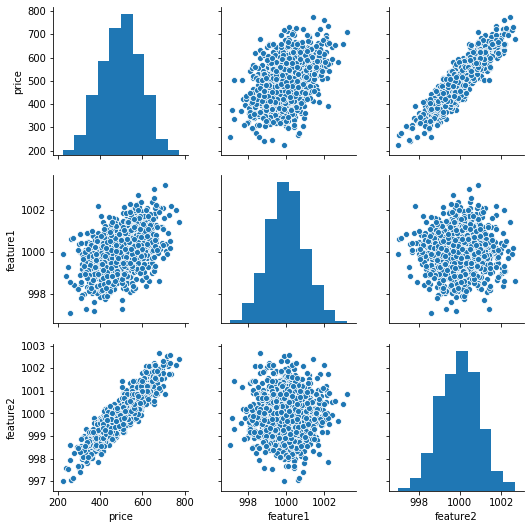

In [39]:
sns.pairplot(df)
# Both features postively corr
# feature 2 has high corr
# distribution for price and both features is normal, no skew
# though the data is fake

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# In TensorFlow have to pass in Numpy arrays instead of Pandas dataframe 
# uppercase X indicates it's a matrix
X = df[['feature1', 'feature2']].values

In [42]:
# lowercase y indicates it's a 1D matrix i.e. vector
y = df['price'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
X_train.shape

(700, 2)

In [45]:
X_test.shape

(300, 2)

In [46]:
y_train.shape

(700,)

In [47]:
y_test.shape 

(300,)

## Normalizing/Scaling the Data

We normalize/scale the feature data, as we're working with weights and biases in a neural network, if we have really large values in our features, that could cause errors with the weight.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re) as labels are used for final comparison at the end.

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
# MinMaxScaler will transform the data based off the standard deviation of the data, as well as the min/ max values
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [50]:
# create an instance of MinMaxScaler
scaler = MinMaxScaler()

In [51]:
# fit the scaler to the training data
# this calculates the parameters (std, min, max) it needs to perform the normalization/scaling
# only fit on the training sets in order to prevent data leakage of the test set,
# i.e. we don't want to assume that we have prior info about the test set,as that would be cheating
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [52]:
# Normalize both X_train and X_test feature sets
X_train = scaler.transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
# values have been scaled
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [55]:
# scaled between 0 and 1
X_train.max()

1.0

In [56]:
X_train.min()

0.0

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [57]:
import tensorflow as tf

In [58]:
print(tf.__version__)

2.1.0


## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

In [61]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:


### Model - as a list of layers

In [62]:
# list of layers
# Dense layer = regular densely-connected NN layer
# i.e. feed forward network where a neuron is connected to every neuron in the next layer
# units = neurons
# activation = string call for the activation function the neurons should use e.g. Sigmoid, ReLu
# e.g. Dense(units=4, activation='relu') or 'sigmoid', etc...
model = Sequential([
    Dense(units=4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1) # don't need activation function on last layer
])

### Model - adding in layers one by one

In [63]:
# preferred method
# as it's easy to edit or turn off one layer by commenting it out
model = Sequential()

model.add(Dense(units=4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))

Let's go ahead and build a simple model and then compile it by defining our solver

In [64]:
# we'll have 3 layers with 4 neurons each, using Rectified Linear Unit (ReLu) activation function
# we'll have a final layer with 1 output neuron
# final layer is important, it will be determined by the data and what is being predicted
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) # one neurons that outputs predicted price


model.compile(optimizer='rmsprop',loss='mse')
# various optimizers such as 'adam'
# see note below on choosing a loss function

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [65]:
# fit model to training data
# epochs=1 means we go through the data set 1 time
# we'll do 250 passes through the training set
# there a method to choose an epoch number
# and a callback function with kersas to add early stopping,
# so model will be smart enough to stop at a particular time that optimized based off some validation loss  
# verbose= param indicates the volume of printed report output during training, default is 1
# verbose=0 means no report will be printed out during training
# Good to set verbose > 0, so you know how training is progressing and which pass (epoch) you're on
model.fit(x=X_train, y=y_train, epochs=250)

# mean square error is very large at the beginning as it starts with random weights and biases
# as the model adjusts the weights and biases, the loss reduced with each epoch and adjusts to a mean square value
# in this case it goes from 256688 to 24

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 2ms/sample - loss: 256688.3581
Epoch 2/250
700/700 [==============================] - 0s 40us/sample - loss: 256620.7703
Epoch 3/250
700/700 [==============================] - 0s 36us/sample - loss: 256548.6298
Epoch 4/250
700/700 [==============================] - 0s 37us/sample - loss: 256466.0580
Epoch 5/250
700/700 [==============================] - 0s 35us/sample - loss: 256370.9630
Epoch 6/250
700/700 [==============================] - 0s 43us/sample - loss: 256262.2996
Epoch 7/250
700/700 [==============================] - 0s 34us/sample - loss: 256137.6666
Epoch 8/250
700/700 [==============================] - 0s 38us/sample - loss: 255994.8412
Epoch 9/250
700/700 [==============================] - 0s 33us/sample - loss: 255834.4155
Epoch 10/250
700/700 [==============================] - 0s 38us/sample - loss: 255653.4371
Epoch 11/250
700/700 [==============================] - 0s 33us/sample - loss: 

700/700 [==============================] - 0s 86us/sample - loss: 23128.1082
Epoch 92/250
700/700 [==============================] - 0s 87us/sample - loss: 19480.2090
Epoch 93/250
700/700 [==============================] - 0s 88us/sample - loss: 16112.2019
Epoch 94/250
700/700 [==============================] - 0s 86us/sample - loss: 13027.8296
Epoch 95/250
700/700 [==============================] - 0s 83us/sample - loss: 10300.2206
Epoch 96/250
700/700 [==============================] - 0s 88us/sample - loss: 7941.7050
Epoch 97/250
700/700 [==============================] - 0s 86us/sample - loss: 5965.5563
Epoch 98/250
700/700 [==============================] - 0s 90us/sample - loss: 4397.4651
Epoch 99/250
700/700 [==============================] - 0s 86us/sample - loss: 3252.4652
Epoch 100/250
700/700 [==============================] - 0s 90us/sample - loss: 2535.4645
Epoch 101/250
700/700 [==============================] - 0s 84us/sample - loss: 2213.6817
Epoch 102/250
700/700 [====

700/700 [==============================] - 0s 74us/sample - loss: 374.6240
Epoch 183/250
700/700 [==============================] - 0s 84us/sample - loss: 362.7875
Epoch 184/250
700/700 [==============================] - 0s 92us/sample - loss: 349.1849
Epoch 185/250
700/700 [==============================] - 0s 79us/sample - loss: 336.2932
Epoch 186/250
700/700 [==============================] - 0s 89us/sample - loss: 321.3754
Epoch 187/250
700/700 [==============================] - 0s 88us/sample - loss: 310.1323
Epoch 188/250
700/700 [==============================] - 0s 79us/sample - loss: 297.4790
Epoch 189/250
700/700 [==============================] - 0s 78us/sample - loss: 283.6992
Epoch 190/250
700/700 [==============================] - 0s 111us/sample - loss: 272.2525
Epoch 191/250
700/700 [==============================] - 0s 53us/sample - loss: 260.7477
Epoch 192/250
700/700 [==============================] - 0s 75us/sample - loss: 250.7800
Epoch 193/250
700/700 [===========

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [67]:
# a dictionary of the historical losses
model.history.history

{'loss': [256688.358125,
  256620.77026785715,
  256548.62982142856,
  256466.0580357143,
  256370.9630357143,
  256262.29964285714,
  256137.66660714286,
  255994.84125,
  255834.41553571427,
  255653.43714285715,
  255449.36142857143,
  255221.49160714285,
  254968.4188392857,
  254689.62723214287,
  254379.17678571428,
  254037.733125,
  253663.47294642858,
  253254.36303571428,
  252807.85696428572,
  252320.91508928573,
  251791.21276785716,
  251218.80848214286,
  250597.30535714285,
  249930.46714285715,
  249210.95339285713,
  248435.44928571428,
  247603.6475,
  246713.3624107143,
  245760.94946428572,
  244744.98294642856,
  243660.67803571429,
  242506.045625,
  241284.21285714285,
  239985.15276785713,
  238604.37080357142,
  237146.27366071427,
  235603.08,
  233982.119375,
  232267.70517857143,
  230465.26625,
  228572.2049107143,
  226581.693125,
  224488.93026785715,
  222298.19089285715,
  220015.06294642857,
  217619.5285714286,
  215120.18883928572,
  212510.61294642

In [71]:
loss_df = pd.DataFrame(model.history.history)

In [72]:
loss_df.head()

,loss
0,256688.358125
1,256620.770268
2,256548.629821
3,256466.058036
4,256370.963036


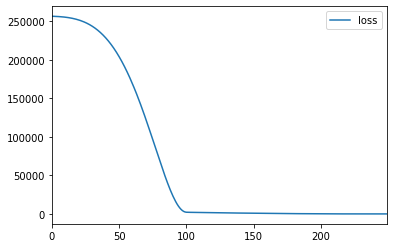

In [73]:
loss_df.plot()
# loss shows a steep drop and then levels off,
# where performance is not improving any longer as you train with more passes (epocs)
# in this case around 100 epocs would be sufficient
# we'll later compare this to our validation loss to check for overfit

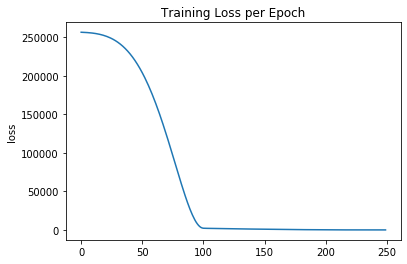

In [77]:
sns.lineplot(x=loss_df.index, y=loss_df['loss'])
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [79]:
model.metrics_names

['loss']

In [80]:
# return the models loss on the test data
# this represents the metric (mean squared error, mse, in our case) loss we've decided on
# mse should be between 24-26
model.evaluate(X_test, y_test, verbose=0)
# verbose=0 for no output

25.428148854573568

In [83]:
train_score = model.evaluate(X_train, y_train, verbose=0)
train_score

23.939601996285575

In [84]:
test_score = model.evaluate(X_test, y_test, verbose=0)
test_score

25.428148854573568

### Further Evaluations

In [85]:
# mse is a way we can interpret our results to see how well the predictions are performing 
# we'll calculate root mean squared error (RMSE) and mean absolute error (MAE)
# first we need to get our predictions
test_predictions = model.predict(X_test)

In [89]:
test_predictions[:5]
# array of array

array([[405.9262 ],
       [623.5503 ],
       [592.1025 ],
       [572.68097],
       [367.93207]], dtype=float32)

In [92]:
test_predictions.shape

(300, 1)

In [93]:
# reshape to dims that pandas series call expects and convert to a pandas series
test_predictions = pd.Series(test_predictions.reshape(300,))

In [96]:
test_predictions[:5]

0    405.926208
1    623.550293
2    592.102478
3    572.680969
4    367.932068
dtype: float32

In [105]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [106]:
pred_df.head()

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [107]:
# combine the y_test and predicitons into one dataframe
pred_df =  pd.concat([pred_df, test_predictions], axis=1)

In [108]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [109]:
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,405.926208
1,624.156198,623.550293
2,582.455066,592.102478
3,578.588606,572.680969
4,371.224104,367.932068


Let's compare to the real test labels!

In [110]:
sns.set_style('darkgrid')

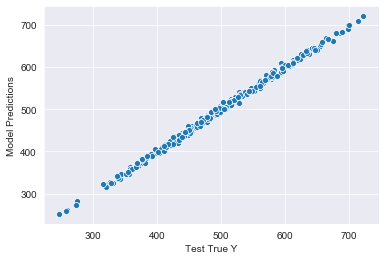

In [111]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)
# prefect match would be a perfect straight line
# we're pretty close, so model is performing well

In [113]:
# add an error column to the dataframe
pred_df['Error'] = pred_df['Test True Y'] - pred_df['Model Predictions']

In [114]:
pred_df.head()

,Test True Y,Model Predictions,Error
0,402.296319,405.926208,-3.629890
1,624.156198,623.550293,0.605905
2,582.455066,592.102478,-9.647412
3,578.588606,572.680969,5.907637
4,371.224104,367.932068,3.292036


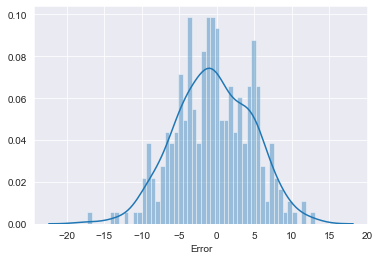

In [115]:
# distribution of errors is normal 
sns.distplot(pred_df['Error'],bins=50)

In [116]:
# MAE and MSE regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [117]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])
# this means on avg our predictions are about $4 off the true price

4.067245979102521

In [122]:
# how do we know if MSE is good/bad?
# depends on the data
# i.e order of magnitude of what we're predicting vs. the order of magnitude of our MAE
df.describe()
# avg price is $500, with min $222, max $774
# since our predictions are off by $4 on avg, which is less than 1% on the mean price of $500
# so the predictions are pretty good - model performs well

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [118]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.428152108581397

In [119]:
# Essentially the same thing as our model.evaluate(), difference just due to precision
# which makes sense since the orginal loss for the model was MSE
test_score

25.428148854573568

In [120]:
# RMSE
test_score**0.5

5.0426331271046845

In [121]:
#or
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.042633449754344

In [124]:
# or using numpy
np.sqrt(test_score)

5.0426331271046845

In [125]:
# and
np.sqrt(mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions']))

5.042633449754344

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [131]:
# [[Feature1, Feature2]]
new_data_point = [[998, 1000]]

In [132]:
# scale/normalize new data point
new_data_point = scaler.transform(new_data_point)

In [133]:
new_data_point

array([[0.14117652, 0.53968792]])

In [134]:
model.predict(new_data_point)
# predicted price is $420

array([[420.80984]], dtype=float32)

## Saving and Loading a Model

In [135]:
# save model especially if it's complex and took a while to train
from tensorflow.keras.models import load_model

In [136]:
# take current model and save as h5 file
model.save('keras_syntax_basics_model.h5')

In [137]:
# now we can load the model in a new notebook if we want
later_model = load_model('keras_syntax_basics_model.h5')
# ignore the warning

In [138]:
# now we can treat the loaded model as any other model to make predictions
later_model.predict(new_data_point)
# predictions is same as before

array([[420.80984]], dtype=float32)